# Lab 3 tutorial: working with proportionality and geometric similarity

**Author**: Sarah Wesolowski [scwesolowski@salisbury.edu]

**Date**: September 18th, 2020

**Purpose**: A notebook that explores proportionality and geometric similarity models.

In [1]:
# perform necessary imports for this notebook
import numpy as np
import matplotlib.pyplot as plt

## Example 1: Is it ok to leave out the y intercept?

Using relative/percent error as a diagnostic on whether a pure proportionality relationship works for different data.

### Generate synthetic data (remove for tutorial)

In [2]:
npts_ex_1_a = 10
xvals_ex_1_a = np.linspace(0.5, 5, num=npts_ex_1_a)
yvals_ex_1_a = np.empty(npts_ex_1_a)
filename_1_a = 'example-1-a-data.npz'
m_const_ex_1_a = 1.
b_const_ex_1_a = 0.1
c_noise_ex_1_a = 20.

In [3]:
np.random.seed(5)

for i in range(0,npts_ex_1_a):
    y_tmp = m_const_ex_1_a * np.log(xvals_ex_1_a[i]) + b_const_ex_1_a
    yvals_ex_1_a[i] = y_tmp  +  c_noise_ex_1_a/100. * np.random.normal()

In [4]:
np.savez(filename_1_a, xvals = xvals_ex_1_a, data = yvals_ex_1_a)

### Load and plot data

Proposed proportionality model is

$$ y \propto \ln x$$

In [5]:
contents_ex_1_a = np.load('example-1-a-data.npz')

In [6]:
contents_ex_1_a.files

['xvals', 'data']

In [7]:
xvals_ex_1_a = contents_ex_1_a['xvals']
yvals_ex_1_a = contents_ex_1_a['data']
npts_ex_1_a = len(xvals_ex_1_a)

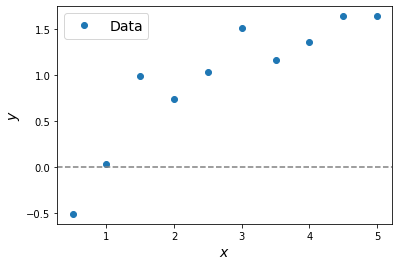

In [8]:
plt.plot(xvals_ex_1_a, yvals_ex_1_a, 'o', label='Data');
plt.xlabel(r'$x$', fontsize=14);
plt.ylabel(r'$y$', fontsize=14);
plt.axhline(0, linestyle='--', color='gray')
plt.legend(fontsize=14);

Note that one of the data points is very close to zero, which might affect the relative error estimates later!

In [9]:
# compute the natural log of x for plotting the proposed model
# np.log is the *natural* log
ln_x_vals_ex_1_a = np.empty(npts_ex_1_a)
for i in range(0, npts_ex_1_a):
    ln_x_vals_ex_1_a[i] = np.log(xvals_ex_1_a[i])

Plot the proposed proportionality relationship

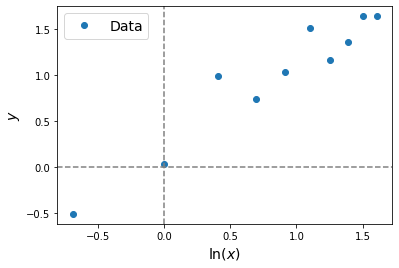

In [10]:
plt.plot(ln_x_vals_ex_1_a, yvals_ex_1_a, 'o', label='Data');
plt.xlabel(r'$\ln (x)$', fontsize=14);
plt.ylabel(r'$y$', fontsize=14);
# plot the origin in case it's not obvious/visible
plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.legend(fontsize=14);

Compute an approximate slope by just taking between first and last points

In [11]:
print('First y value =', yvals_ex_1_a[0])
print('Last y value =', yvals_ex_1_a[npts_ex_1_a-1])
print('First ln(x) value =', ln_x_vals_ex_1_a[0])
print('Last ln(x) value =', ln_x_vals_ex_1_a[npts_ex_1_a-1])

k_approx_ex_1_a = (yvals_ex_1_a[npts_ex_1_a-1] - yvals_ex_1_a[0])/(ln_x_vals_ex_1_a[npts_ex_1_a-1] - ln_x_vals_ex_1_a[0])
print('Approximate slope =', round(k_approx_ex_1_a,2))

First y value = -0.504901683182937
Last y value = 1.6434639208782285
First ln(x) value = -0.6931471805599453
Last ln(x) value = 1.6094379124341003
Approximate slope = 0.93


Create the model predictions and plot $y$ vs. $\ln x$

In [12]:
model_y_vals_ex_1_a = np.empty(npts_ex_1_a)
for i in range(0, npts_ex_1_a):
    model_y_vals_ex_1_a[i] = k_approx_ex_1_a * ln_x_vals_ex_1_a[i]

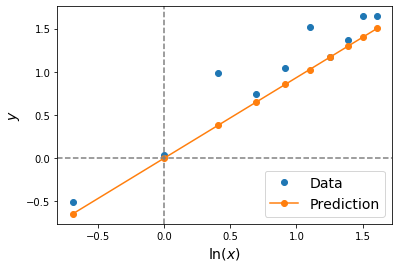

In [13]:
plt.plot(ln_x_vals_ex_1_a, yvals_ex_1_a, 'o', label='Data');
plt.plot(ln_x_vals_ex_1_a, model_y_vals_ex_1_a, '-o', label='Prediction');
plt.xlabel(r'$\ln (x)$', fontsize=14);
plt.ylabel(r'$y$', fontsize=14);
# plot the origin in case it's not obvious/visible
plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.legend(fontsize=14);

Not bad, could be moved up a bit though

### Generate synthetic data (remove for tutorial)

In [14]:
npts_ex_2_a = 10
xvals_ex_2_a = np.linspace(-1, 1, num=npts_ex_2_a)
yvals_ex_2_a = np.empty(npts_ex_2_a)
filename_2_a = 'example-2-a-data.npz'
m_const_ex_2_a = 0.5
b_const_ex_2_a = 1.
c_noise_ex_2_a = 30.

In [15]:
np.random.seed(10)

for i in range(0,npts_ex_2_a):
    y_tmp = m_const_ex_2_a * np.exp(xvals_ex_2_a[i]) + b_const_ex_2_a
    yvals_ex_2_a[i] = y_tmp  +  c_noise_ex_2_a/100. * np.random.normal()

In [16]:
np.savez(filename_2_a, xvals = xvals_ex_2_a, data = yvals_ex_2_a)

### Load and plot data

Proposed proportionality model is

$$ y \propto e^x $$

In [17]:
contents_ex_2_a = np.load('example-2-a-data.npz')

In [18]:
contents_ex_2_a.files

['xvals', 'data']

In [19]:
xvals_ex_2_a = contents_ex_2_a['xvals']
yvals_ex_2_a = contents_ex_2_a['data']
npts_ex_2_a = len(xvals_ex_2_a)

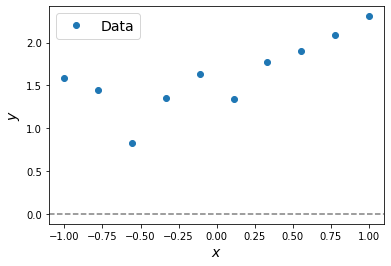

In [20]:
plt.plot(xvals_ex_2_a, yvals_ex_2_a, 'o', label='Data');
plt.xlabel(r'$x$', fontsize=14);
plt.ylabel(r'$y$', fontsize=14);
plt.axhline(0, linestyle='--', color='gray')
plt.legend(fontsize=14);

In [21]:
# compute exp(x) for plotting the proposed model
# np.exp is the function needed
exp_x_vals_ex_2_a = np.empty(npts_ex_2_a)
for i in range(0, npts_ex_2_a):
    exp_x_vals_ex_2_a[i] = np.exp(xvals_ex_2_a[i])

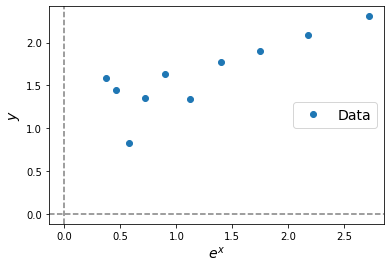

In [22]:
plt.plot(exp_x_vals_ex_2_a, yvals_ex_2_a, 'o', label='Data');
plt.xlabel(r'$e^x$', fontsize=14);
plt.ylabel(r'$y$', fontsize=14);
# plot the origin in case it's not obvious/visible
plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.legend(fontsize=14);

Compute an approximate slope by just taking between fourth and last points

In [23]:
print('Fourth y value =', yvals_ex_2_a[3])
print('Last y value =', yvals_ex_1_a[npts_ex_2_a-1])
print('Fourth e^(x) value =', exp_x_vals_ex_2_a[3])
print('Last e^(x) value =', exp_x_vals_ex_2_a[npts_ex_2_a-1])

k_approx_ex_2_a = (yvals_ex_2_a[npts_ex_1_a-1] - yvals_ex_2_a[3])/(exp_x_vals_ex_2_a[npts_ex_2_a-1] - exp_x_vals_ex_2_a[3])
print('Approximate slope =', round(k_approx_ex_2_a,2))

Fourth y value = 1.3557505003083379
Last y value = 1.6434639208782285
Fourth e^(x) value = 0.7165313105737893
Last e^(x) value = 2.718281828459045
Approximate slope = 0.48


Create the model predictions and plot $y$ vs. $e^x$

In [24]:
model_y_vals_ex_2_a = np.empty(npts_ex_2_a)
for i in range(0, npts_ex_2_a):
    model_y_vals_ex_2_a[i] = k_approx_ex_2_a * exp_x_vals_ex_2_a[i]

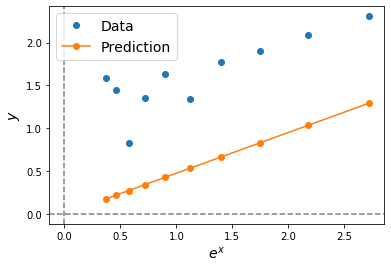

In [25]:
plt.plot(exp_x_vals_ex_2_a, yvals_ex_2_a, 'o', label='Data');
plt.plot(exp_x_vals_ex_2_a, model_y_vals_ex_2_a, '-o', label='Prediction');
plt.xlabel(r'$e^x$', fontsize=14);
plt.ylabel(r'$y$', fontsize=14);
# plot the origin in case it's not obvious/visible
plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.legend(fontsize=14);

## Example 2: Kepler's Third Law

$$ T = c R^{3/2} $$

In [26]:
n_planets = 8
T_vals = np.array([88, 224.7, 365.3,687.0,4331.8,10760.0,30684.0,60188.3])
R_vals = np.array([36, 67.25, 93, 141.75, 483.80, 887.97, 1764.50, 2791.05])

In [27]:
R_32_vals = np.empty(n_planets)
for i in range(0,n_planets):
    R_32_vals[i] = R_vals[i]**(1.5)

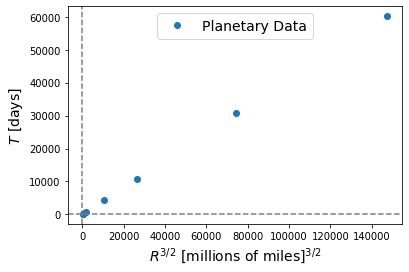

In [28]:
plt.plot(R_32_vals, T_vals, 'o', label='Planetary Data');
plt.xlabel(r'$R^{3/2}$ [millions of miles]${}^{3/2}$', fontsize=14);
plt.ylabel(r'$T$ [days]', fontsize=14);
# plot the origin in case it's not obvious/visible
plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.legend(fontsize=14);

Estimate slope using first and last points

In [29]:
c_val = (T_vals[n_planets-1]-T_vals[0])/(R_32_vals[n_planets-1]-R_32_vals[0])

In [30]:
print('c =', c_val)

c = 0.4081895394231869


In [31]:
model_T_vals = np.empty(n_planets)
for i in range(0, n_planets):
    model_T_vals[i] = c_val * R_32_vals[i]

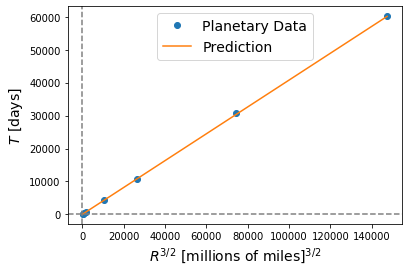

In [32]:
plt.plot(R_32_vals, T_vals, 'o', label='Planetary Data');
plt.plot(R_32_vals, model_T_vals, '-', label='Prediction');
plt.xlabel(r'$R^{3/2}$ [millions of miles]${}^{3/2}$', fontsize=14);
plt.ylabel(r'$T$ [days]', fontsize=14);
# plot the origin in case it's not obvious/visible
plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.legend(fontsize=14);

## Bass fishing example

Length is given in inches, and weight is in ounces

In [39]:
fish_length = np.array([14.5, 12.5, 17.25, 14.5, 
                        12.625, 17.75, 14.125,12.625])
fish_weight = np.array([27, 17, 41, 26, 17, 49, 23, 16])
n_fish = len(fish_weight)

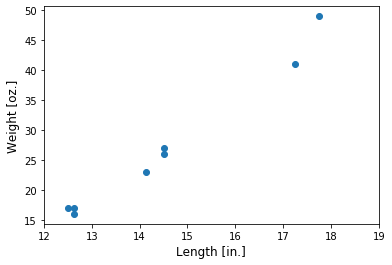

In [40]:
plt.plot(fish_length, fish_weight, 'o');
plt.xlabel('Length [in.]', fontsize=12);
plt.ylabel('Weight [oz.]', fontsize=12);
plt.xlim([12,19]);

Model is that $W \propto l^3$. Test proportionality by plotting $W$ vs. $l^3$

In [42]:
fish_length3 = np.empty(n_fish)
for i in range(0, n_fish):
    fish_length3[i] = fish_length[i]**3.0

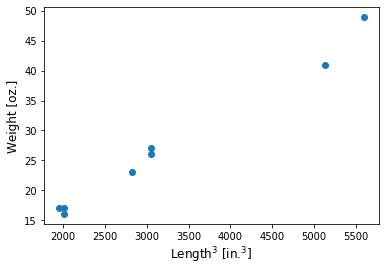

In [53]:
plt.plot(fish_length3, fish_weight, 'o');
plt.xlabel('Length${}^3$ [in.${}^3$]', fontsize=12);
plt.ylabel('Weight [oz.]', fontsize=12);

Change things up and find the slope using the line of best fit. Note that to use the proportionality model, we have to ignore the y intercept.

In [46]:
from scipy import stats

In [47]:
fish_slope, fish_intercept, r_value, p_value, std_err =\
                                stats.linregress(fish_length3, fish_weight)
print("slope: %f    intercept: %f" % (fish_slope, fish_intercept))

slope: 0.008468    intercept: -0.117116


It is reassuring that the estimated intercept is small relative to the range of weights, 20 to 50, that were measured. This, added to the roughly linear structure of the graph, is an indication that proportionality is good assumption.

In [48]:
fish_weight_predictions = np.empty(n_fish)
for i in range(0, n_fish):
    fish_weight_predictions[i] = fish_slope * fish_length3[i]

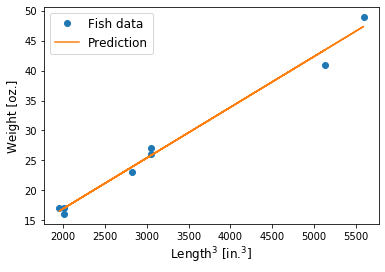

In [52]:
plt.plot(fish_length3, fish_weight, 'o', label='Fish data');
plt.plot(fish_length3, fish_weight_predictions, '-', label='Prediction')
plt.xlabel('Length${}^3$ [in.${}^3$]', fontsize=12);
plt.ylabel('Weight [oz.]', fontsize=12);
#plt.axhline(0, color='gray', linestyle='--');
#plt.axvline(0, color='gray', linestyle='--');
plt.legend(fontsize=12);

Let's round this out by plotting in the original variables $W$ and $l$. The way the l values were spaced will cause issues in seeing the plot in these variables. A way to get around that is to extend the range of $l$ values used and use more points for the weight prediction.

In [60]:
n_fish_more = 50
fish_length_extended = np.linspace(10,20, num=n_fish_more)
fish_weight_pred_extended = np.empty(n_fish_more)
# predict for 100 fish lengths between 10 and 20 inches
for i in range(0, n_fish_more):
    fish_weight_pred_extended[i] =\
             fish_slope * fish_length_extended[i]**3.0

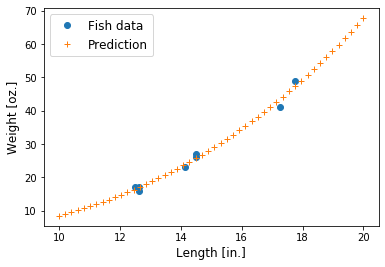

In [65]:
plt.plot(fish_length, fish_weight, 'o', label='Fish data');
plt.plot(fish_length_extended, fish_weight_pred_extended, '+', label='Prediction')
plt.xlabel('Length [in.]', fontsize=12);
plt.ylabel('Weight [oz.]', fontsize=12);
#plt.axhline(0, color='gray', linestyle='--');
#plt.axvline(0, color='gray', linestyle='--');
plt.legend(fontsize=12);

### Compute absolute and percent error

To further analyze the bass fishing model, compute absolute and percent errors

In [66]:
fish_abs_err = np.empty(n_fish)
fish_perc_err = np.empty(n_fish)
for i in range(0, n_fish):
    fish_abs_err[i] = abs(fish_weight[i] - fish_weight_predictions[i])
    fish_perc_err[i] = fish_abs_err[i]/fish_weight[i] * 100.0

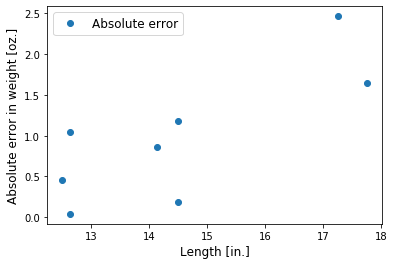

In [67]:
plt.plot(fish_length, fish_abs_err, 'o', label='Absolute error');
plt.xlabel('Length [in.]', fontsize=12);
plt.ylabel('Absolute error in weight [oz.]', fontsize=12);
#plt.axhline(0, color='gray', linestyle='--');
#plt.axvline(0, color='gray', linestyle='--');
plt.legend(fontsize=12);

It's hard to recognize a pattern here because there are not many data points. The predictions are slightly worse in absolute terms for larger fish.

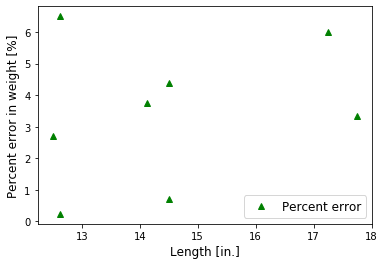

In [68]:
plt.plot(fish_length, fish_perc_err, '^',
         label='Percent error', color='green');
plt.xlabel('Length [in.]', fontsize=12);
plt.ylabel('Percent error in weight [%]', fontsize=12);
#plt.axhline(0, color='gray', linestyle='--');
#plt.axvline(0, color='gray', linestyle='--');
plt.legend(fontsize=12);

When viewed as a percent, the model makes similar mistakes across all lengths of fish.